# Ejercicios 

In [ ]:
import numpy as np

---
## Convoluciones de arrays

:::{exercise}
:label: chapther2-convolution

Dadas dos funciones de variable real $f$ y $g$, definimos la [**convolución**](https://en.wikipedia.org/wiki/Convolution) de $f$ y $g$ como

$$
(f*g)(x) = \int_\mathbb{R} f(t)g(x - t)dt.
$$

La versión discreta de la anterior definición puede ser la siguiente. Datos $f=(f_0, \dots, f_{n-1})$ y $g=(g_0, \dots, g_{m-1})$ dos vectores (representados por arrays unidimensionales) de tamaño $n$ y $m$, respectivamente, definimos el array `conv` de dimensión `n + m - 1` cuya componente $k$ vale 

$$
\sum_{i + m -1 = k + j}f_ig_j
$$

para $0 \leq k \leq n + m - 1$. 

Crea una función `conv` que tome como inputs dos arrays y devuelva la convolución de ambos. Por ejemplo 

```
arr1 = np.arange(10)
arr2 = np.arange(5) 
conv(arr1, arr2)
>>> [ 0  4 11 20 30 40 50 60 70 80 50 26  9  0]
```

:::

:::{solution} chapther2-convolution
:class: dropdown

Una primera solución iterando sobre todos las posibles combinaciones de $i$ y $j$ para cada $k$
```
from itertools import product

def conv(f, g):
    n = f.shape[0]
    m = g.shape[0]
    conv_dim = n + m - 1
    arr_conv = np.zeros(conv_dim, dtype=f.dtype)
    for k in range(conv_dim):
        my_gen = (
            f[i]*g[j] for i, j in product(range(n), range(m)) \
                if i + m - 1 == j + k
        )
        arr_conv[k] = sum(my_gen)
    return arr_conv
```

Otra solución más directa considerando la matrix *producto exterior* de $f$ y $g$ y sumando las diagonales 

```
def conv2(f, g):
    i = f.shape[0]
    j = g.shape[0]
    outer_mat = np.outer(f, g).T
    c = np.array([np.trace(outer_mat, offset=k) for k in range(-j + 1, i)])
    return c
```

:::


---
## Procesando imágenes con numpy

:::{exercise}
:label: chapther2-images

Una de las posibles técnicas que existen para comprimir una imagen es utilizar [la descomposición SVD (Singular Value Decomposition)](https://en.wikipedia.org/wiki/Singular_value_decomposition) que nos permite expresar una matrix $A$ de dimensiones $n\times m$ como un producto

$$ 
A = U \Sigma V^t
$$

donde $U$ y $V$ son cuadradas de dimensiones $n$ y $m$ respectivamente y $\Sigma$ es diagonal y está formada por los [valores singulares](https://en.wikipedia.org/wiki/Singular_value) de $A$ ordenados de mayor a menor (siempre son números reales y positivos). 

Recuerda que una imagen no es más que un conjunto de 3 matrices, cada una representando la intensidad de la grilla de píxeles para cada color (rojo, verde y azul). Una forma de comprimir una imagen consiste en quedarse con los $k$ primeros valores singulares para cada color e intercambiar $k$ por una se las dimensiones que representan el alto o el ancho de la imagen. 

Crea una función `aproxima_img` que tome un array de dimensión $(3, h, w)$ y devuelva otra imagen aproximada de dimensión $(3, h, w)$ utilizando los k primeros valores singulares. Para ello, 
1. Utiliza la función `scipy.misc.face` para generar una imagen de prueba, o también puedes importar una utilizando `im = cv2.imread("img.jpg")`. Puedes visualizar imágenes con este formato a través del la función `imshow` de `matplotlib.pyplot` (a veces hay que cambiar de orden los canales).
2. Utiliza la función `svd` de `np.linalg` para realizar la descomposición SVD. Mucho cuidado con las dimensiones que espera la función. 
3. Otras funciones que pueden ser útiles para el ejercicio: `np.transpose`, `np.zeros`, `np.fill_diagonal`, `np.clip`.

:::

In [43]:
import numpy as np
from scipy.misc import face
import matplotlib.pyplot as plt

im = face()

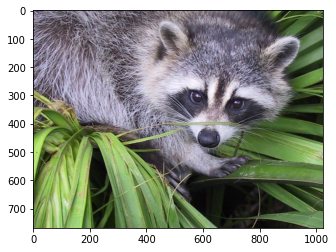

In [3]:
plt.imshow(im)

In [5]:
from sklearn.datasets import load_sample_images
data=load_sample_images()

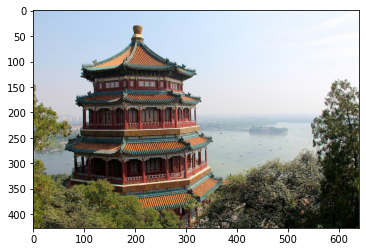

In [17]:
plt.imshow(data.images[0])

In [6]:
import cv2

In [21]:
yo = cv2.imread("img.jpg")

In [22]:
yo.shape

(400, 300, 3)

In [10]:
# yo.shape

AttributeError: ignored

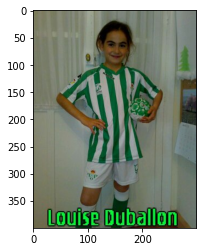

In [27]:
plt.imshow(yo[:,:,slice(None,None,-1)])

Antes de aplicar svd tenemos que trasponer la imagen.

In [44]:
im = np.transpose(im,(2,0,1))

In [45]:
U,s,Vt = np.linalg.svd(im) # s es un vector... nosotros lo queremos como matriz

In [46]:
print(U.shape)
print(s.shape)
print(Vt.shape) 

(3, 768, 768)
(3, 768)
(3, 1024, 1024)


El siguiente paso es conseguir que S sea una matriz de dimensiones (400,300) con k elementos en su diagonal (los k primeros elementos de S).

In [33]:
k = 50
S = np.zeros((400,300))
S = np.fill_diagonal(S,s[:k])

In [ ]:
print(s[:k])

In [37]:
# def aproxima_img(im,k):
#   im = np.transpose(im,(2,0,1))
#   h = im.shape[0]
#   w = im.shape[1]
#   # U,s,Vt = np.linalg.svd(im)
#   im_comprimida = np.zeros((3,h,w))
#   for canal in range(3):
#     np.fill_diagonal(S[canal,:,:],s[canal,:])
#   im_c = U @ S[:,:,:k] @ Vt[:,:k,:]
#   im_c = im_c / im_c.max()
#   return im_c

In [47]:
def aproxima_img(im, k):
    im_t = np.transpose(im, (2, 0, 1))
    h = im.shape[0]
    w = im.shape[1]
    # U, s, Vt = np.linalg.svd(im_t)
    S = np.zeros((3, h, w))
    for canal in range(3):
        np.fill_diagonal(S[canal, :, :], s[canal, :])
    im_c = U @ S[:, :, :k] @ Vt[:, :k, :]
    im_c = im_c / im_c.max()
    return im_c

In [48]:
im_c = aproxima_img(im,k=10)

ValueError: ignored

:::{exercise}
:label: chapter2-images-convolution

Importa una imagen de tu elección utilizando la función `imread` de la librería `cv2`. Crea un array `kernel` de dimensión $(n, n)$ y realiza la convolución de tu imagen con `kernel` mediante la función [`scipy.signal.convolve2d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html#scipy.signal.convolve2d) (parámetro `mode='same'`). Si tu imagen tiene varios canales para los colores, aplica el mismo kernel a cada canal.

Algunos ejemplos interesantes de kernel pueden ser los siguientes:

- $n = 3$ con valores 

$$
\begin{pmatrix}
-3 & 0 & 3\\
-10 & 0 & 10\\
-3 & 0 & 3
\end{pmatrix} 
$$

- transpuesta del anterior, 

$$
\begin{pmatrix}
-3 & -10 & -3\\
0 & 0 & 0\\
3 & 10 & 3
\end{pmatrix} 
$$

- $n \approx 50$, generados con `scipy.signal.windows.gaussian` (puedes utilizar la función `np.outer` para realizar un producto exterior)

- Operador complejo de Sharr
```
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],

                   [-10+0j, 0+ 0j, +10 +0j],

                   [ -3+3j, 0+10j,  +3 +3j]])
```
Puedes visualizar las imágenes con `matplotlib.pyplot.imshow`.

:::

---
## Regresión Lineal

:::{exercise}
:label: chapter2-linear-regression

Considera un modelo de regresión lineal que consiste en estimar una variable $y$ como una suma ponderada de un cojunto de variables regresoras 

$$
\hat{y} = \theta_0 + \theta_1x_1 + \dots \theta_nx_n
$$

donde 

- $n$ es el conjunto de variables regresoras o *features*, $x_i$ el valor correspondiente.
- $\hat{y}$ es el valor predicho. 
- $\theta_i$ son parámetros del modelo para $0 \leq i \leq n$.  

Podemos expresar dicha ecuación en formato matricial como

$$
\hat{y} = 
\begin{pmatrix}
1 & x_1 & \cdots & x_n
\end{pmatrix} 
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_n
\end{pmatrix} 
=
\boldsymbol{x} \cdot \boldsymbol{\theta}.
$$

Dado un conjunto de $m$ observaciones, nuestro objetivo es encontrar $\boldsymbol{\theta}$ tal que se minimice nuestra aproximación lineal en términos de menores cuadrados 

$$
\frac{1}{m}\sum_{i=1}^{m} 
(\boldsymbol{x}_i \cdot \boldsymbol{\theta} - y_i)^2.
$$

El valor óptimo de los parámetros se puede calcular directamente 

$$
\hat{\theta} = (\boldsymbol{X}^t\boldsymbol{X})^{-1}\boldsymbol{X}^ty
$$

donde 

$$
\boldsymbol{X} = 
\begin{pmatrix}
1 & x_{11} & \cdots & x_{1n} \\
1 & x_{21} & \cdots & x_{2n} \\
\vdots & \vdots & \cdots & \vdots \\
1 & x_{m1} & \cdots & x_{mn} 
\end{pmatrix}
$$

es el conjunto de observaciones de las variables regresoras e

$$
\hat{y}=
\begin{pmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{pmatrix}
$$

es el conjunto de observaciones de la variable objetivo.


Crea una clase `RegresionLineal` con dos métodos, 
- `entrena`: toma como parámetros `X` e `y`, observaciones de las variables regresoras y objetivo, respectivamente, y calcula los coeficientes de la regresión lineal y los guarda en un atributo `_theta`. 
- `transforma`: toma como parámetro una serie de observaciones nuevas `X` y devuelve una estimación `y_hat` de la varible objetivo utilizando el método descrito anteriormente. 

Funciones que puede ser de ayuda: `np.linalg.inv`, `np.linalg.pinv`, `np.vstack`, `np.hstack`.

:::

Nos vamos a inventar unos datos.

In [49]:
rng = np.random.default_rng()

In [50]:
n = 20
m = 300

In [60]:
x_test = 4+3*rng.standard_normal((m,n))

In [54]:
theta_test = rng.integers(10,size=n)

In [55]:
theta_test

array([3, 7, 1, 1, 5, 7, 5, 3, 7, 8, 1, 1, 5, 4, 4, 9, 5, 8, 9, 5])

In [61]:
y_test = 4+3*x_test@theta_test

In [62]:
y_test.shape

(300,)

Hasta aquí la generación de datos.

In [84]:
class RegressionLineal:
  def entrena(self,X,y):
    # primer paso: añadir la fila de 1a a la X
    ones = np.ones((X.shape[0],1))
    X_b = np.hstack((ones,X))
    self._theta = np.linalg.inv(X_b.T@X_b)@X_b.T@y
    return X_b
  def transforma(self,X):
    ones = np.ones((X.shape[0],1))
    X_b = np.hstack((ones,X))
    y_hat = X_b@self._theta
    return y_hat

In [85]:
regresion_lineal = RegressionLineal()

In [86]:
regresion_lineal.entrena(x_test,y_test)

array([[ 1.        ,  0.18501325,  5.72481473, ...,  4.0110395 ,
        -0.42947568, -2.76201167],
       [ 1.        , -0.16518313, -0.73858542, ...,  8.07871697,
         7.75466312,  8.1619886 ],
       [ 1.        ,  4.42596638,  5.69265119, ...,  7.19394347,
         1.60393703,  0.44293687],
       ...,
       [ 1.        ,  8.48644705, -0.88287355, ...,  1.42054739,
         4.9936479 , -0.10588736],
       [ 1.        ,  4.15373427,  6.30791322, ...,  6.84374167,
         4.91797102,  6.79919333],
       [ 1.        ,  6.65943742,  5.02280038, ...,  4.92538028,
         5.3975167 ,  3.98686195]])

In [87]:
regresion_lineal._theta

array([ 4.,  9., 21.,  3.,  3., 15., 21., 15.,  9., 21., 24.,  3.,  3.,
       15., 12., 12., 27., 15., 24., 27., 15.])

In [88]:
yhat = regresion_lineal.transforma(x_test)

In [89]:
yhat

array([1009.4715529 , 1360.24717505, 1241.36009544, 1251.87897197,
       1508.87606641, 1433.03211394, 1338.96814297, 1137.31615   ,
       1497.86300754, 1350.89468276, 1234.13280938, 1416.81329049,
       1496.14654229, 1192.51569494,  895.80537795, 1418.81070624,
        888.47861611, 1370.29006845, 1116.78280357, 1079.04729975,
       1136.58325195, 1164.57908383,  977.04075168, 1196.19423587,
       1158.01191776,  684.84631775, 1370.54497737, 1016.42770072,
        845.99411887, 1186.87749731, 1194.39242579,  996.09124516,
        891.60455199, 1016.74055251, 1268.22996327,  992.56473208,
       1139.2175486 , 1339.23149832, 1211.66676575, 1290.33944214,
       1106.19918209, 1442.71919022, 1306.7710655 ,  984.19132888,
       1040.52783373, 1286.06971541,  913.06208515, 1024.16291272,
       1241.72056981, 1295.78950506, 1320.66464585, 1013.24589356,
        847.07079695, 1435.50489458,  925.11487766, 1329.23839019,
       1107.25218606,  780.2856406 , 1117.8423013 ,  992.83564

In [90]:
theta_test

array([3, 7, 1, 1, 5, 7, 5, 3, 7, 8, 1, 1, 5, 4, 4, 9, 5, 8, 9, 5])

In [91]:
regresion_lineal._theta

array([ 4.,  9., 21.,  3.,  3., 15., 21., 15.,  9., 21., 24.,  3.,  3.,
       15., 12., 12., 27., 15., 24., 27., 15.])